# Figure 15 for corrigendum to 2016 JAMES Tracmip introduction paper

Data is taken from ESGF copy of TRACMIP at KIT SCC LSDFONLINE

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.patches import Rectangle

# my module functions to load tracmip data, plot colors, model names etc.
import tracmip as tm

import warnings
warnings.filterwarnings("ignore")

## Load time-mean precipitation

In [2]:
pr_aqct = 86400*np.array(np.load('./postdata_npz/pr_aquaControlTRACMIP.timmean.npz')['pr'])
pr_aq4x = 86400*np.array(np.load('./postdata_npz/pr_aqua4xCO2TRACMIP.timmean.npz'  )['pr'])
pr_ldct = 86400*np.array(np.load('./postdata_npz/pr_landControlTRACMIP.timmean.npz')['pr'])
pr_ld4x = 86400*np.array(np.load('./postdata_npz/pr_land4xCO2TRACMIP.timmean.npz'  )['pr'])

## Zonal-mean time-mean precipitation

In [17]:
pr_aqct_zm = np.nanmean(pr_aqct, axis=2)
pr_aq4x_zm = np.nanmean(pr_aq4x, axis=2)
pr_ldct_zm = np.nanmean(pr_ldct, axis=2)
pr_ld4x_zm = np.nanmean(pr_ld4x, axis=2)

## Calculate time-mean ITCZ position for land simulations at each longitude

In [6]:
# my atmospheric python package for ITCZ calculation
import sys
sys.path.append('/home/fd8940/Dropbox/Python3/mymodules/')
import atmosphere as atm

In [9]:
itcz_ldct = np.zeros((tm.nmod, tm.nlonint)) + np.nan
itcz_ld4x = np.zeros((tm.nmod, tm.nlonint)) + np.nan
for m in range(tm.nmod):
    for i in range(tm.nlonint):
        itcz_ldct[m,i] = atm.get_itczposition(pr_ldct[m,:,i], tm.latint, 30, 0.1)
        itcz_ld4x[m,i] = atm.get_itczposition(pr_ld4x[m,:,i], tm.latint, 30, 0.1)

## Plotting

In [10]:
def make_niceplot1(ax):
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks([-8, -6, -4, -2, 0, 2, 4, 6, 8])
    ax.xaxis.set_ticklabels(['-8', '', '-4', '', '0', '', '4', '', '8'], fontsize=10)
    ax.yaxis.set_ticks([-0.5, 0, 0.5])
    ax.yaxis.set_ticklabels(['30S', 'Eq', '30N'], fontsize=10) 
    plt.xlim(-8, 8), plt.ylim(-0.6, 0.6)  

def make_niceplot2(ax):
    ax.xaxis.set_ticks([-120, -60, 0, 60, 120])
    ax.xaxis.set_ticklabels(['120W', '60W', '0', '60E', '120E'], fontsize=10)
    ax.yaxis.set_ticks([-0.5, 0, 0.5])
    ax.yaxis.set_ticklabels([''], fontsize=10) 
    plt.xlim(-175, 175), plt.ylim(-0.6, 0.6)

In [11]:
sinlat = np.sin(tm.latint*np.pi/180.0)

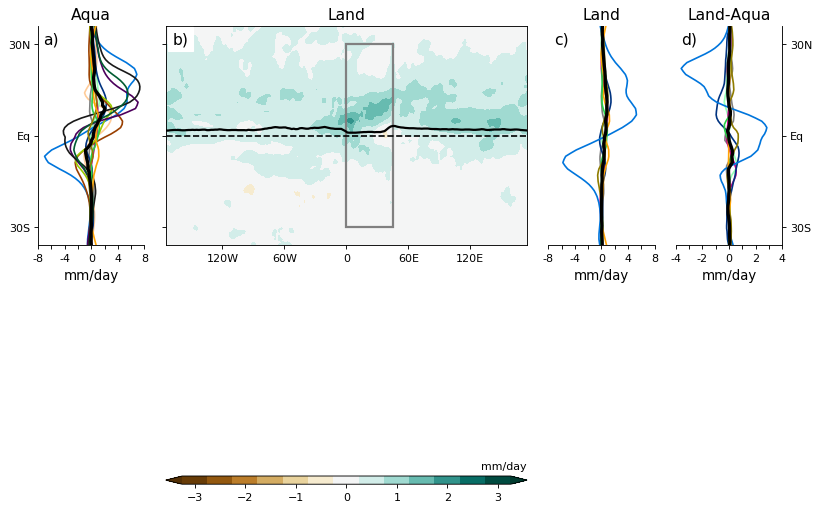

In [19]:
plt.figure(figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
clev = np.array([-3.25, -2.75, -2.25, -1.75, -1.25, -0.75, -0.25, 0.25, 0.75, 1.25, 1.75, 2.25, 2.75, 3.25])

ax = plt.subplot2grid((2, 6), (0, 0))
for m in tm.modlist_aq4x:
    plt.plot((pr_aq4x_zm-pr_aqct_zm)[m], sinlat, color=tm.modcolors[m])
plt.plot(np.nanmedian((pr_aq4x_zm-pr_aqct_zm)[tm.modlist_aq4x], axis=0), sinlat, color='k', linewidth=3)
make_niceplot1(ax)
plt.text(0.05, 0.94, 'a)', fontsize=14, ha='left', va='center', transform=ax.transAxes)
plt.xlabel('mm/day', fontsize=12)
plt.title('Aqua', fontsize=14)

ax = plt.subplot2grid((2, 6), (0, 1), colspan=3)
c = plt.contourf(tm.lonint, sinlat, np.nanmedian((pr_ld4x-pr_ldct)[tm.modlist_ldct],axis=0), clev, extend='both', cmap=cm.BrBG)
ax.add_patch(Rectangle((0, -0.5), 45, 1, alpha=1, facecolor='none', edgecolor='gray', linewidth=2))
plt.plot([-200, 200], [0, 0], 'k--')
plt.plot(tm.lonint, np.sin(np.nanmedian(itcz_ldct[tm.modlist_ldct], axis=0)*np.pi/180.0), 'k', linewidth=2)
make_niceplot2(ax)
plt.text(0.02, 0.94, 'b)', fontsize=14, ha='left', va='center', transform=ax.transAxes, backgroundcolor='white')
plt.title('Land', fontsize=14)


ax = plt.subplot2grid((2, 6), (1, 1), colspan=3)
ax.axis('off')
cbar = plt.colorbar(c, ticks=[-3, -2, -1, 0, 1, 2, 3], orientation='horizontal', aspect=40)
cbar.ax.tick_params(labelsize=10)
plt.text(1, -0.17, 'mm/day', fontsize=10, ha='right')

ax = plt.subplot2grid((2, 6), (0, 4))
for m in tm.modlist_ld4x:
    plt.plot((pr_ld4x_zm-pr_ldct_zm)[m], sinlat, color=tm.modcolors[m])
plt.plot(np.nanmedian((pr_ld4x_zm-pr_ldct_zm)[tm.modlist_ld4x], axis=0), sinlat, color='k', linewidth=3)
make_niceplot1(ax)
ax.spines['left'].set_color('none')
ax.yaxis.set_ticks_position('none')
ax.yaxis.set_ticklabels([''], fontsize=10) 
plt.text(0.05, 0.94, 'c)', fontsize=14, ha='left', va='center', transform=ax.transAxes, backgroundcolor='white')
plt.xlabel('mm/day', fontsize=12)
plt.title('Land', fontsize=14)

ax = plt.subplot2grid((2, 6), (0, 5))
for m in tm.modlist_ld4x:
    plt.plot((pr_ld4x_zm-pr_ldct_zm)[m] - (pr_aq4x_zm-pr_aqct_zm)[m], sinlat, color=tm.modcolors[m])
plt.plot(np.nanmedian(((pr_ld4x_zm-pr_ldct_zm)-(pr_aq4x_zm-pr_aqct_zm))[tm.modlist_ld4x], axis=0), sinlat, color='k', linewidth=3)
make_niceplot1(ax)
ax.yaxis.set_ticks_position('right')
ax.spines['right'].set_color('k')
ax.spines['left'].set_color('none')
plt.text(0.05, 0.94, 'd)', fontsize=14, ha='left', va='center', transform=ax.transAxes, backgroundcolor='none')
plt.xlabel('mm/day', fontsize=12)
plt.title('Land-Aqua', fontsize=14)
ax.xaxis.set_ticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])
ax.xaxis.set_ticklabels(['-4', '', '-2', '', '0', '', '2', '', '4'], fontsize=10)
plt.xlim(-4, 4)

plt.tight_layout
plt.savefig('figs/corrigendumpaper_figure15.pdf')